In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.offsetbox import AnchoredText
import plotly.express as px
%matplotlib inline
sns.set(rc={'figure.figsize':(12.5,8.27)})
pd.set_option('display.max_columns', None)

import scipy
from scipy import signal
import statsmodels.api as sm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
#import time series data
df_total=pd.read_csv('/Users/wypa/Google Drive/MSc WIN/05_HS2020/VMAT/Data/final_df.csv')
df_total=df_total[['Date','temp_min','rain_dur',
       'overlap_wo_shelter','pfuusbus_commuters',
       'weekend','payday','holiday_bool','AHV/IV_payday','shelter'
      ]]
df_total = df_total.dropna(axis=0)
df_total.head(5)

,Date,temp_min,rain_dur,overlap_wo_shelter,pfuusbus_commuters,weekend,payday,holiday_bool,AHV/IV_payday,shelter
0,2012-05-21,11.10,277.32,59.0,0.0,0,0,0,0,55
1,2012-05-22,13.33,294.97,59.0,0.0,0,1,0,0,50
2,2012-05-23,15.00,354.30,59.0,0.0,0,1,0,0,53
3,2012-05-24,15.00,73.07,59.0,0.0,0,1,0,0,53
4,2012-05-25,15.56,0.02,59.0,0.0,1,0,0,0,52


<AxesSubplot:>

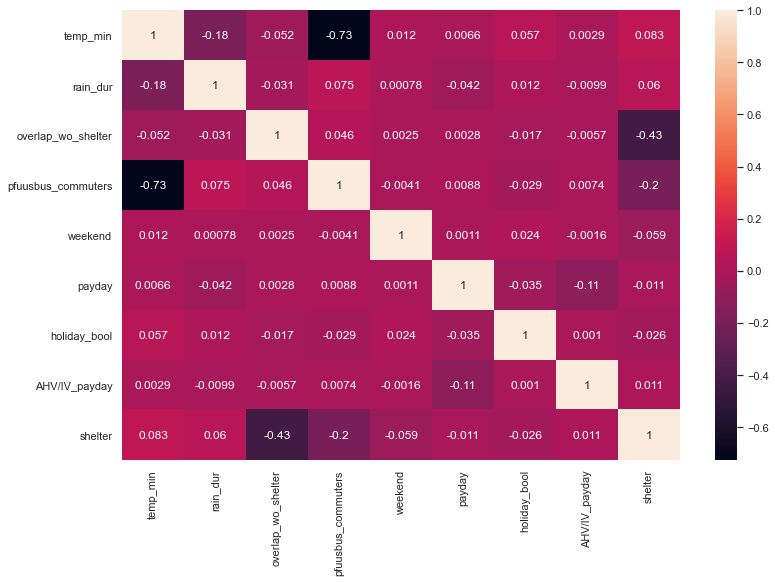

In [3]:
sns.heatmap(df_total.corr(),annot=True)

In [4]:
#split data frames by year and store in list
df_total.Date=pd.to_datetime(df_total.Date)
df_total['year']=pd.DatetimeIndex(df_total.Date).year
df_total=df_total.set_index('Date')

frames = []
year = 2012

for i in range(0,9):
    i = df_total.loc[df_total.year == year]
    frames.append(i)
    year+=1
    
frames[0].head()

,temp_min,rain_dur,overlap_wo_shelter,pfuusbus_commuters,weekend,payday,holiday_bool,AHV/IV_payday,shelter,year
Date,,,,,,,,,,
2012-05-21,11.10,277.32,59.0,0.0,0,0,0,0,55,2012
2012-05-22,13.33,294.97,59.0,0.0,0,1,0,0,50,2012
2012-05-23,15.00,354.30,59.0,0.0,0,1,0,0,53,2012
2012-05-24,15.00,73.07,59.0,0.0,0,1,0,0,53,2012
2012-05-25,15.56,0.02,59.0,0.0,1,0,0,0,52,2012


In [5]:
#calculate VIF for each year
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df=pd.DataFrame()

for i in range(0,9):
    X = frames[i].drop(columns=['shelter','year'])
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]
    vif_data=pd.pivot_table(data=vif_data,columns='feature')
    vif_df=vif_df.append(vif_data)

vif_df['year']=[2012,2013,2014,2015,2016,2017,2018,2019,2020]

#reshape data frame
vif_df=pd.DataFrame(data=vif_df,columns=['AHV/IV_payday', 'holiday_bool', 'overlap_wo_shelter', 'payday',
       'pfuusbus_commuters', 'rain_dur', 'temp_min', 'weekend', 'year'])

#set index
vif_df=vif_df.set_index('year')
vif_df

,AHV/IV_payday,holiday_bool,overlap_wo_shelter,payday,pfuusbus_commuters,rain_dur,temp_min,weekend
year,,,,,,,,
2012,1.121163,1.060629,8.294031,1.158030,2.582645,1.679311,5.672309,1.169925
2013,1.149244,1.070262,8.419404,1.131667,4.024526,1.507511,4.800331,1.168628
2014,1.127522,1.064715,12.705834,1.136564,3.909514,1.578171,6.887694,1.173465
2015,1.142363,1.084830,8.444750,1.135085,3.550984,1.382582,4.629979,1.183076
2016,1.124787,1.078213,7.836025,1.135333,3.254788,1.496783,4.082569,1.176347
2017,1.137656,1.063357,7.479293,1.142014,3.287715,1.466669,3.832666,1.165143
2018,1.136040,1.070608,8.804529,1.126247,3.759039,1.439879,5.201319,1.166305
2019,1.120678,1.074612,6.855450,1.141204,3.077857,1.426632,3.732825,1.164264
2020,1.131110,1.050530,10.831751,1.133863,3.196546,1.483805,6.505538,1.176961


Text(0.5, 1.0, 'Variance Inflation Factor (VIF) by year and variable')

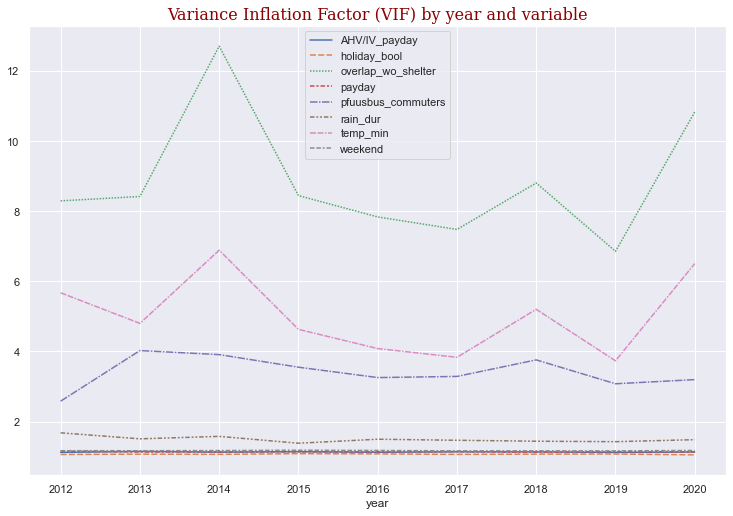

In [6]:
#visualize VIF

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

fig=sns.lineplot(data=vif_df)
plt.title('Variance Inflation Factor (VIF) by year and variable',fontdict=font)

## Interpretation of the Values
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated. 
#### source: https://www.statisticshowto.com/variance-inflation-factor/

### Assumption: 
- Multicolinearity between overlap_wo_shelter and temp_min?

<AxesSubplot:>

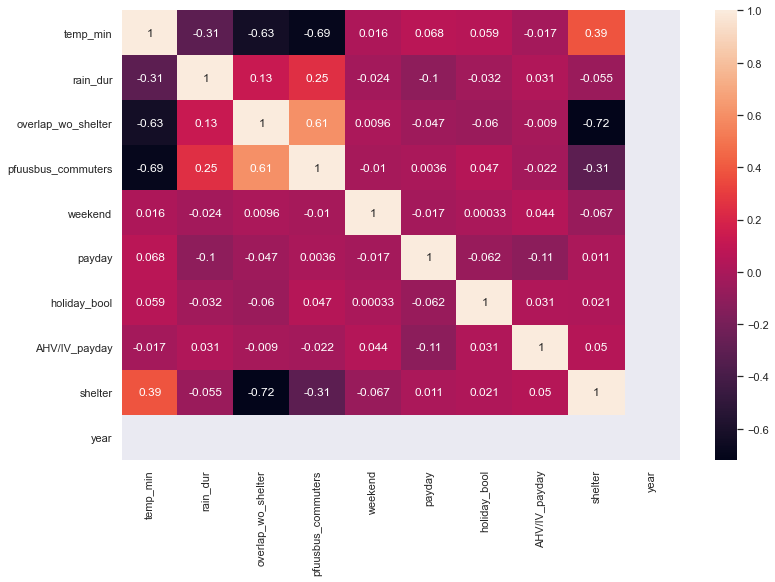

In [17]:
sns.heatmap(frames[0].corr(),annot=True)

<AxesSubplot:>

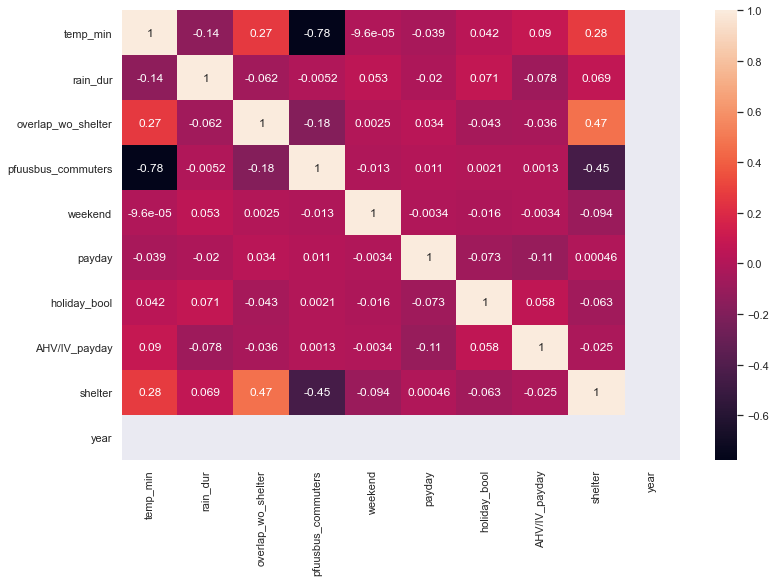

In [18]:
sns.heatmap(frames[1].corr(),annot=True)

<AxesSubplot:>

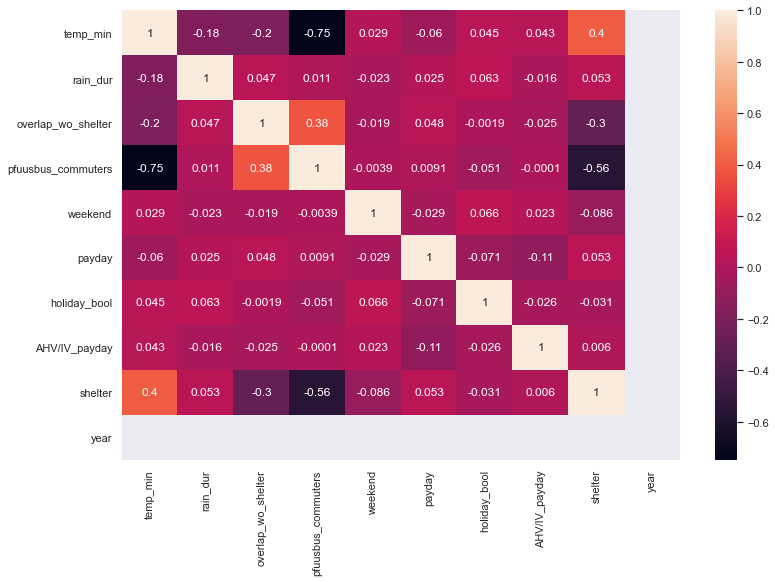

In [19]:
sns.heatmap(frames[2].corr(),annot=True)

<AxesSubplot:>

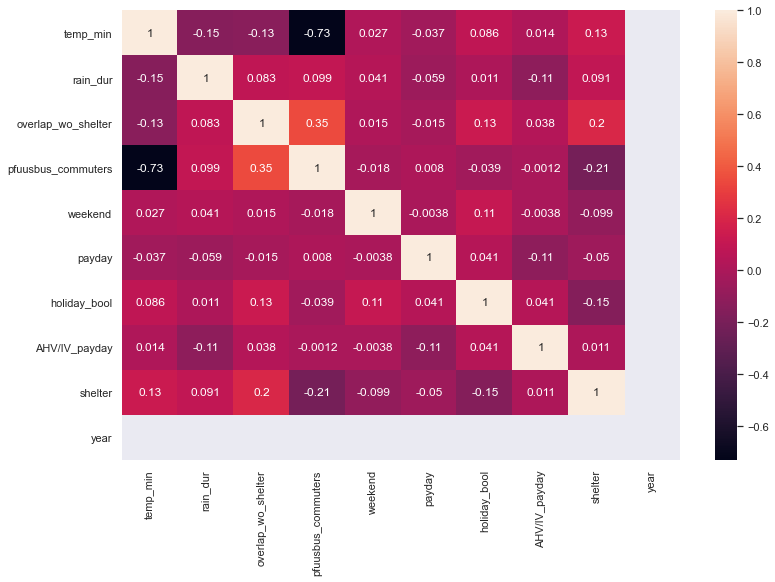

In [20]:
sns.heatmap(frames[3].corr(),annot=True)

<AxesSubplot:xlabel='Date'>

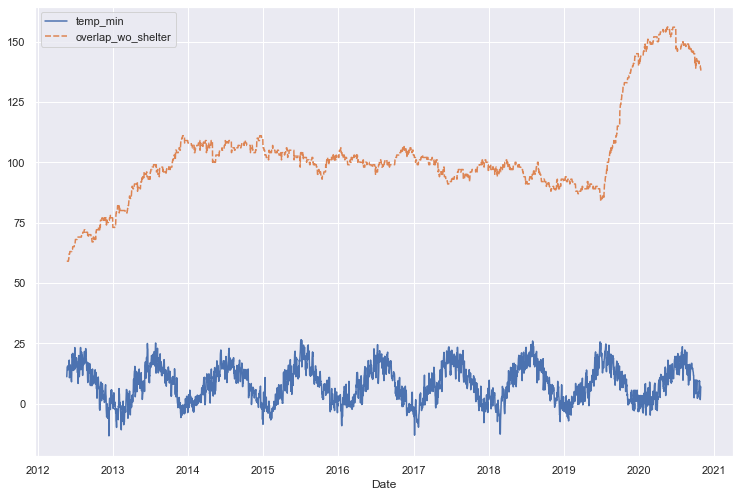

In [7]:
sns.lineplot(data=df_total[['temp_min','overlap_wo_shelter']])

<AxesSubplot:xlabel='Date'>

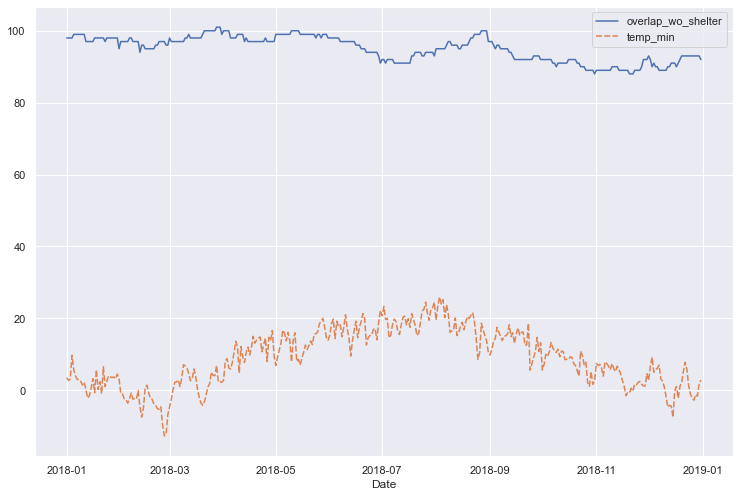

In [8]:
sns.lineplot(data=frames[6][['overlap_wo_shelter','temp_min']])

In [9]:
sns.heatmap()

TypeError: heatmap() missing 1 required positional argument: 'data'